**Import Libraries**

In [1]:
from libraries import*
from B_simulation_NMR import wX, Ispin, w0, delta_ppm, eta, CQ_M, Qeta, alpha, beta, gama, QPAS,  Siso_ppm, Siso
from functions import fourier3, fourier5, Rabc


Welcome to JupyROOT 6.26/06
iminuit version: 2.17.0


**Fit Sum Frequency**

┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -4.57e-10   -0.0137  1.84e-10 │
│ b │   -0.0137         1  -2.3e-10   -0.0194    -8e-10 │
│ c │ -4.57e-10  -2.3e-10         1  3.31e-08 -4.09e-16 │
│ d │   -0.0137   -0.0194  3.31e-08         1 -1.24e-08 │
│ e │  1.84e-10    -8e-10 -4.09e-16 -1.24e-08         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.16e-18 (chi2/ndof = 0.0) │              Nfcn = 159              │
│ EDM = 9.14e-21 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minim

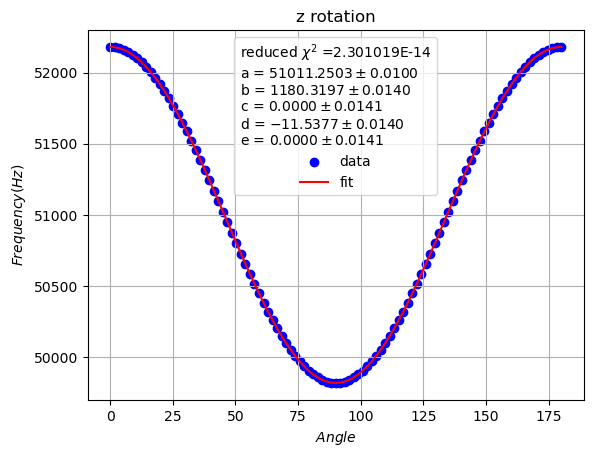

a = 51011.25031647396
b = 1180.3197474057893
c = 1.1140520026971739e-12
d = -11.537712538615526
e = 1.4526705800598445e-13
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  1.79e-12   -0.0137  1.04e-13 │
│ b │   -0.0137         1 -1.41e-10   -0.0194   1.3e-11 │
│ c │  1.79e-12 -1.41e-10         1  2.75e-12 -1.83e-21 │
│ d │   -0.0137   -0.0194  2.75e-12         1 -2.51e-13 │
│ e │  1.04e-13   1.3e-11 -1.83e-21 -2.51e-13         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.038e-18 (chi2/ndof = 0.0)│              Nfcn = 157              │
│ EDM = 9.28e-20 (Goal: 0.0002)    │               

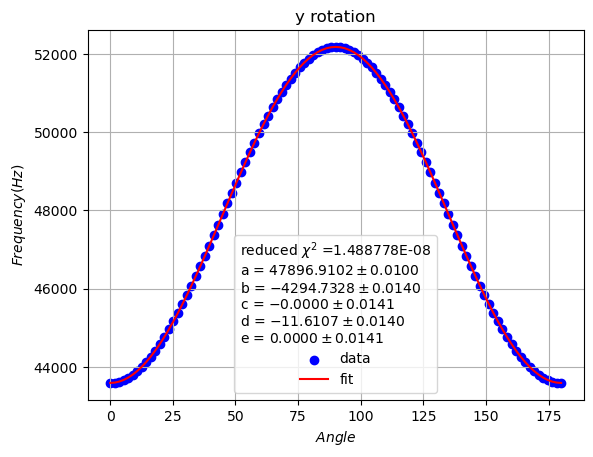

a = 47896.9101793859
b = -4294.732840013303
c = 1.827011879708903e-12
d = -11.610668058078675
e = 8.391482302467766e-13
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -5.65e-10   -0.0137  1.62e-10 │
│ b │   -0.0137         1 -8.83e-10   -0.0194 -1.18e-10 │
│ c │ -5.65e-10 -8.83e-10         1  4.15e-08 -4.74e-16 │
│ d │   -0.0137   -0.0194  4.15e-08         1 -1.14e-08 │
│ e │  1.62e-10 -1.18e-10 -4.74e-16 -1.14e-08         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.859e-18 (chi2/ndof = 0.0)│              Nfcn = 153              │
│ EDM = 1.47e-20 (Goal: 0.0002)    │                  

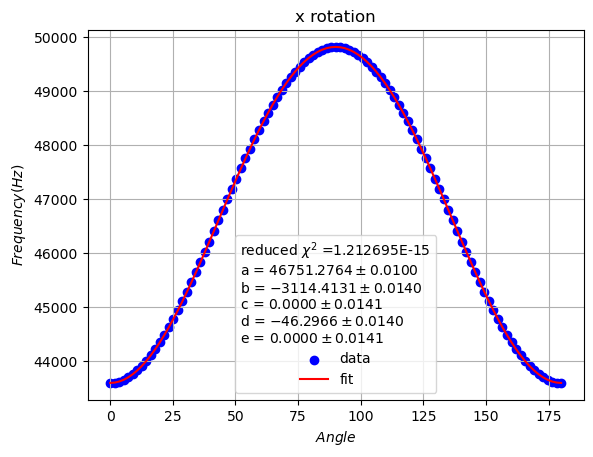

a = 46751.27641015013
b = -3114.41309260751
c = -8.018052730262783e-13
d = -46.29664622809066
e = 9.62966147019153e-13


In [3]:
m_s = [0]*3
corr_mat = [0]*3



for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_sum, 0.1,fourier5)
    
    m_s[i] = Minuit(least_squares, a = 1, b = 1, c= 1, d = 0, e = 1).migrad()
    # m[i] = m[i].scan(ncall = 50)

    # m[i].migrad()  # finds minimum of least_squares function
    m_s[i].hesse()   # accurately computes uncertainties
    
    fit_info = [
        f"reduced $\\chi^2$ ={(m_s[i].fval / (len(df[i].angle) - m_s[i].nfit)):5E}"
    ]
    # print(fit_info)
    
    for p, v, e in zip(m_s[i].parameters, m_s[i].values, m_s[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_s[i].covariance.correlation())
    print(corr_mat)
    print(m_s[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_sum, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_s[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_s[i].parameters, m_s[i].values):
        print(f"{key} = {value}")

**Fit Difference Frequency**

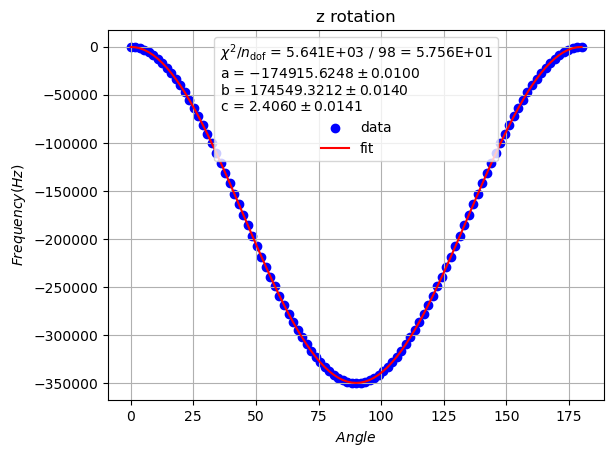

a = -174915.62481816762
b = 174549.32118654053
c = 2.4059564047701243


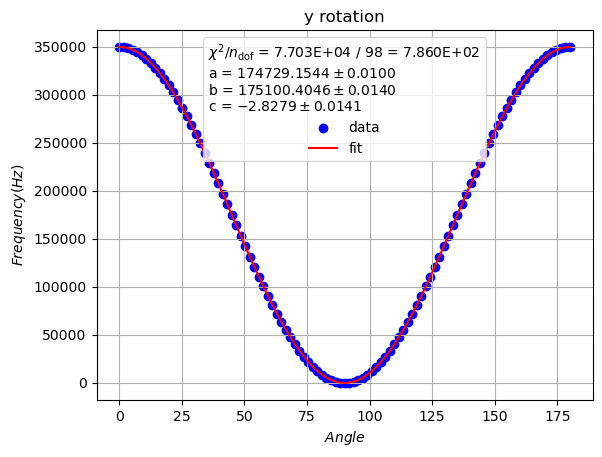

a = 174729.154400411
b = 175100.40460689325
c = -2.8279003055249867


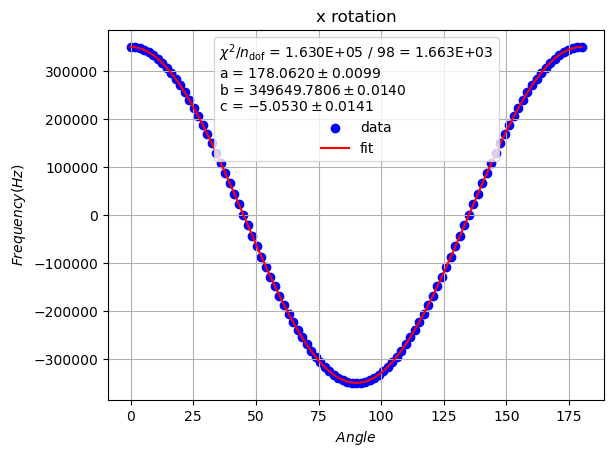

a = 178.06204966602178
b = 349649.78064524237
c = -5.0530432089025865


In [4]:
m_d = [0]*3

for i in range(3):
    least_squares = LeastSquares(df[i].angle, df[i].freq_diff, 0.1,fourier3)
    
    m_d[i] = Minuit(least_squares, a = -0, b = -0, c= 0)
    # m_d[i].fixed["c"] = True
    # m_d[i].fixed["b"] = True
    # m[i] = m[i].scan(ncall = 50)

    m_d[i].migrad()  # finds minimum of least_squares function
    m_d[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_d[i].fval:.3E} / {m_d[i].ndof:.0f} = {m_d[i].fmin.reduced_chi2:.3E}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_d[i].parameters, m_d[i].values, m_d[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_d[i].covariance.correlation())
    # print(corr_mat)
    # print(m_d[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, df[i].freq_diff, label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_d[i].values), label="fit", color = 'red')
    # plt.plot(df[i].angle, HQ1[i], label = 'input ')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_d[i].parameters, m_d[i].values):
        print(f"{key} = {value}")

**Find HQ1**

[-366.3036316270882, -349464.9460047082, 349829.55900730425]


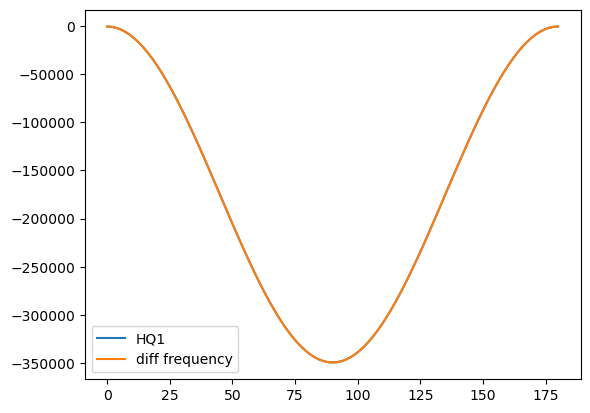

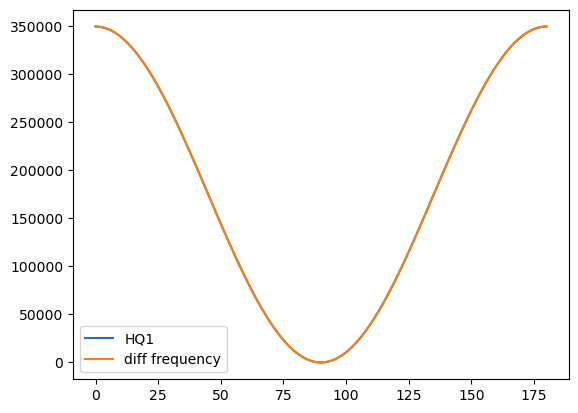

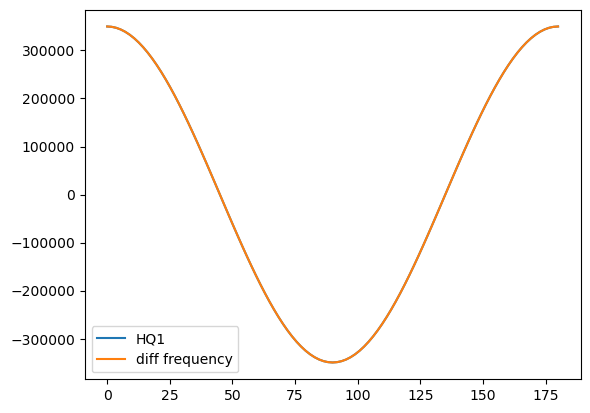

In [5]:
a_s = [0]*3; a_d = [0]*3
b_s = [0]*3; b_d = [0]*3
c_s = [0]*3; c_d = [0]*3
d_s = [0]*3
e_s = [0]*3

par_s = [a_s, b_s, c_s, d_s, e_s]
par_d = [a_d, b_d, c_d]

for i in range(0,3):
    for k in range(len(par_s)):
        par_s[k][i] = m_s[i].values[k]
    for j in range(len(par_d)):
        par_d[j][i] = m_d[i].values[j]

A = [0]*3
B = [0]*3
C = [0]*3
A_HQ1 = [0]*3
B_HQ1 = [0]*3
X = [0]*3


for i in range(0,3):
    A_HQ1[i] = np.array([[1/2, 1/2], [1/2, -1/2]])
    B_HQ1[i] = np.array([a_d[i], b_d[i]])
    X[i] = np.linalg.inv(A_HQ1[i]).dot(B_HQ1[i])

gxx_q = X[0][0]
gyy_q= X[0][1]
gxy_q = -c_d[0]

gzz_q = X[1][0]
gxz_q = c_d[1]

gyz_q = -c_d[2]

Q_offdia = [ gxy_q, gxz_q, gyz_q]
Q_dia = [gxx_q, gyy_q, gzz_q]
print(Q_dia)

A = np.array([gzz_q + gyy_q, gzz_q + gxx_q, gxx_q + gyy_q])*1/2
B = np.array([gzz_q - gyy_q, gzz_q - gxx_q, gxx_q - gyy_q ])*1/2
C = np.array([-gyz_q, gxz_q, -gxy_q])

HQ1= [0]*3

for i in range(3):
   HQ1[i] = a_d[i] + b_d[i]*np.cos(2*df[i].angle*np.pi/180.) + c_d[i]*np.cos(2*df[i].angle*np.pi/180.) 

   #Plot to check that difference frequency is mostly HQ1
   plt.plot(df[i].angle, HQ1[i], label = 'HQ1')
   plt.plot(df[i].angle, df[i].freq_diff, label = 'diff frequency')
   plt.legend()
   plt.show()

**Verify Tensor Components from HQ2**

In [6]:
Dz = (7/96*gxy_q**2 - 7/384*(gxx_q - gyy_q)**2)/wX
Ez = 7/96*(gxx_q - gyy_q)*gxy_q/wX

Dy = (7/96*gxz_q**2 - 7/384*(gxx_q - gzz_q)**2)/wX
Ey = 7/96*(gxx_q - gzz_q)*gxz_q/wX

Dx = (7/96*gyz_q**2 - 7/384*(gzz_q - gyy_q)**2)/wX
Ex = 7/96*(gzz_q - gyy_q)*gyz_q/wX

table = [['Dz', d_s[0], Dz],  ['Ez', e_s[0], Ez], ['Dy', d_s[1], Dy],  ['Ey', e_s[1], Ey], ['Dx', d_s[2], Dx],  ['Ex', e_s[2], Ex]]
print(tabulate(table, headers=['Coefficient','Coefficients from fit', 'Calculated coefficients']))

Coefficient      Coefficients from fit    Calculated coefficients
-------------  -----------------------  -------------------------
Dz                       -11.5377                   -11.5377
Ez                         1.45267e-13               -0.000318067
Dy                       -11.6107                   -11.6104
Ey                         8.39148e-13                0.000375023
Dx                       -46.2966                   -46.296
Ex                         9.62966e-13                0.00133812


**Find HQ2**

In [7]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3
# x coefficients
A[2] = (3/64*(gzz_q + gyy_q)**2 + 3/128*(gyy_q-gzz_q)**2 + 3/32*gyz_q**2 + 1/8*gxz_q**2 + 1/8*gxy_q**2)/wX
B[2] = (1/32*(gyy_q**2 - gzz_q**2) -1/24*gxy_q**2 + 1/24*gxz_q**2)/wX
C[2] = (1/16*(gzz_q + gyy_q)*gyz_q - 1/12*gxz_q*gxy_q)/wX
D[2] = Dx
E[2] = Ex

#y coefficients
A[1] = (3/64*(gzz_q + gxx_q)**2 + 3/128*(gxx_q-gzz_q)**2 + 3/32*gxz_q**2 + 1/8*gyz_q**2 + 1/8*gxy_q**2)/wX
B[1] = (1/32*(gxx_q**2 - gzz_q**2) - 1/24*gxy_q**2 + 1/24*gyz_q**2)/wX
C[1] = (-1/16*(gzz_q + gxx_q)*gxz_q + 1/12*gyz_q*gxy_q)/wX
D[1] = Dy
E[1] = Ey

#z coefficients
A[0] = (3/64*(gyy_q + gxx_q)**2 + 3/128*(gxx_q-gyy_q)**2 + 3/32*gxy_q**2 + 1/8*gxz_q**2 + 1/8*gyz_q**2)/wX
B[0] = (-1/32*(gyy_q**2 - gxx_q**2) + 1/24*gxz_q**2 - gyz_q**2)/wX
C[0] = (1/16*(gyy_q + gxx_q)*gxy_q - 1/12*gxz_q*gyz_q)/wX
D[0] = Dz  
E[0] = Ez

HQ2 = [0]*3
for i in range(0,3):
    HQ2[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Find HCSA1**

In [8]:
A_csa = [0]*3
B_csa = [0]*3
C_csa = [0]*3

for i in range(0,3):
    # A[i]=A[i]
    # B[i]=B[i]
    # C[i]=C[i]
    A_csa[i] = a_s[i] - A[i]
    B_csa[i] = b_s[i] - B[i]
    C_csa[i] = c_s[i] - C[i]

**Find CSA**

┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -1.24e-11   -0.0137  2.09e-11 │
│ b │   -0.0137         1  9.66e-10   -0.0194 -1.78e-09 │
│ c │ -1.24e-11  9.66e-10         1 -1.88e-11 -1.72e-18 │
│ d │   -0.0137   -0.0194 -1.88e-11         1  3.47e-11 │
│ e │  2.09e-11 -1.78e-09 -1.72e-18  3.47e-11         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.086e-20 (chi2/ndof = 0.0)│              Nfcn = 155              │
│ EDM = 1.07e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minim

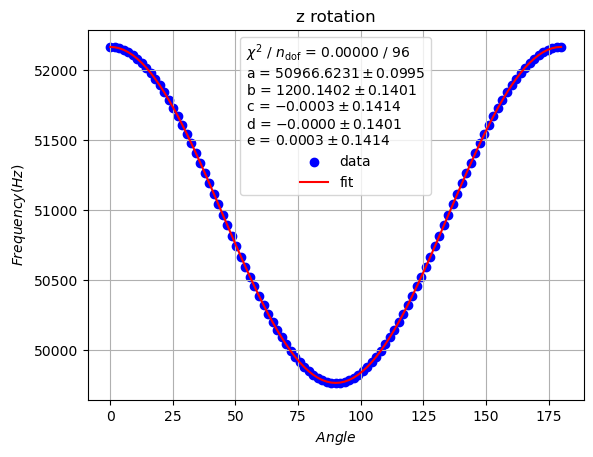

a = 50966.62306842723
b = 1200.1401861090676
c = -0.0002732075389114281
d = -2.709661907401829e-06
e = 0.0003180674294368499
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137 -1.72e-12   -0.0137 -2.27e-12 │
│ b │   -0.0137         1   1.5e-10   -0.0194  1.45e-10 │
│ c │ -1.72e-12   1.5e-10         1 -2.95e-12 -4.88e-13 │
│ d │   -0.0137   -0.0194 -2.95e-12         1 -2.81e-12 │
│ e │ -2.27e-12  1.45e-10 -4.88e-13 -2.81e-12         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.421e-18 (chi2/ndof = 0.0)│              Nfcn = 171              │
│ EDM = 1.43e-18 (Goal: 0.0002)    │             

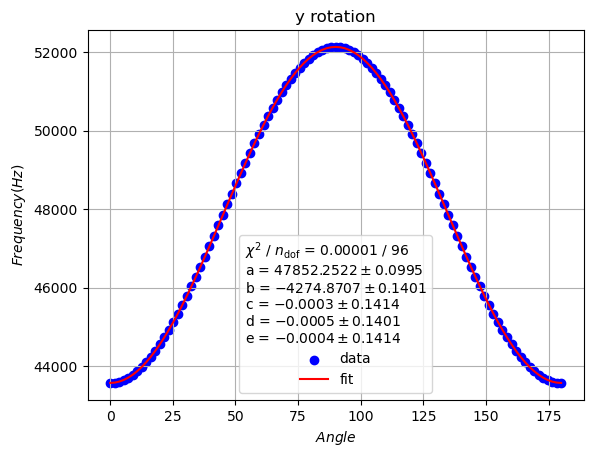

a = 47852.252183558034
b = -4274.871020656228
c = -0.0003207709141866407
d = -0.0003179967511295155
e = -0.0003750234194758572
┌───┬───────────────────────────────────────────────────┐
│   │         a         b         c         d         e │
├───┼───────────────────────────────────────────────────┤
│ a │         1   -0.0137  7.22e-12   -0.0137 -1.66e-13 │
│ b │   -0.0137         1 -3.51e-10   -0.0194  5.12e-10 │
│ c │  7.22e-12 -3.51e-10         1  6.77e-12  2.22e-16 │
│ d │   -0.0137   -0.0194  6.77e-12         1    -1e-11 │
│ e │ -1.66e-13  5.12e-10  2.22e-16    -1e-11         1 │
└───┴───────────────────────────────────────────────────┘
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.843e-20 (chi2/ndof = 0.0)│              Nfcn = 151              │
│ EDM = 2.59e-22 (Goal: 0.0002)    │           

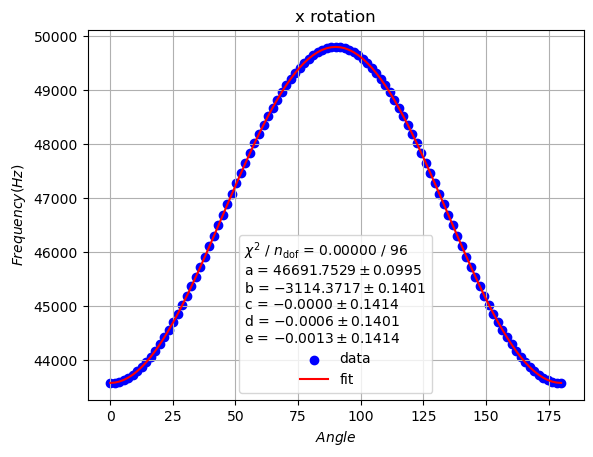

a = 46691.75294171649
b = -3114.371711819041
c = -5.950836650082059e-07
d = -0.0006404224421082007
e = -0.0013381241574516782


In [9]:
m_csa = [0]*3
y_csa = [0]*3
# y_csa[0] = np.subtract(f_s[0], HQ2[0]) 
# print(f_s[0], HQ2[0], y_csa[0])
# 
for i in range(0,3):
    y_csa[i] = np.subtract(df[i].freq_sum, HQ2[i])    
    least_squares = LeastSquares(df[i].angle, y_csa[i], 1,fourier5)
    
    m_csa[i] = Minuit(least_squares, a = -1, b = -1, c= -1, d =1, e = 1)
    # m[i] = m[i].scan(ncall = 50)

    m_csa[i].migrad()  # finds minimum of least_squares function
    m_csa[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_csa[i].fval:.5f} / {len(df[i].angle) - m_csa[i].nfit}",
    ]
    # print(fit_info)
    

    for p, v, e in zip(m_csa[i].parameters, m_csa[i].values, m_csa[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    corr_mat = (m_csa[i].covariance.correlation())
    print(corr_mat)
    print(m_csa[i].migrad())
    # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, y_csa[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier5(df[i].angle, *m_csa[i].values), label="fit", color = 'red')
    plt.xlabel(r'$Angle$')
    plt.ylabel(r'$Frequency (Hz)$')
    # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()
    
    for key, value in zip(m_csa[i].parameters, m_csa[i].values):
        print(f"{key} = {value}")

a_csa = [0]*3; 
b_csa = [0]*3; 
c_csa = [0]*3; 
d_csa = [0]*3
e_csa = [0]*3
par_csa = [a_csa, b_csa, c_csa, d_csa, e_csa]

for i in range(0,3):
    for k in range(len(par_csa)):
        par_csa[k][i] = m_csa[i].values[k]

In [10]:
A= [0]*3
B = [0]*3
C = [0]*3
A_HCSA1 = [0]*3
B_HCSA1 = [0]*3
X = [0]*3


for i in range(0,3):

    A_HCSA1[i] = np.array([[3/2, 3/2], [3/2, -3/2]])
    B_HCSA1[i] = np.array([a_csa[i], b_csa[i]])
    X[i] = np.linalg.inv(A_HCSA1[i]).dot(B_HCSA1[i])
    

gxx_csa = X[0][0]
gyy_csa= X[0][1]
gxy_csa = -c_csa[0]/(3)

gzz_csa = X[1][0]
gxz_csa = c_csa[1]/(3)

gyz_csa = -c_csa[2]/(3)


print(tabulate([['gxx_q',gxx_q], ['gyy_q',gyy_q], ['gzz_q',gzz_q], ['gxy_q',gxy_q], ['gyz_q',gyz_q], ['gxz_q',gxz_q],['gxx_csa',gxx_csa], ['gyy_csa',gyy_csa], ['gzz_csa',gzz_csa], ['gxy_csa',gxy_csa], ['gyz_csa',gyz_csa], ['gxz_csa',gxz_csa]]))

-------  -----------------
gxx_q       -366.304
gyy_q    -349465
gzz_q     349830
gxy_q         -2.40596
gyz_q          5.05304
gxz_q         -2.8279
gxx_csa    17388.9
gyy_csa    16588.8
gzz_csa    14525.8
gxy_csa        9.10692e-05
gyz_csa        1.98361e-07
gxz_csa       -0.000106924
-------  -----------------


In [11]:
print(QPAS)

[[   -367.325            0.               0.        ]
 [      0.         -349466.00833333       0.        ]
 [      0.               0.          349833.33333333]]


**Check Input**

In [23]:
#****** Input Vaue****************
#coupling values for NAV (taken from paper https://pubmed.ncbi.nlm.nih.gov/22027340/)


#for CSA
Siso_fit = (gxx_csa + gyy_csa + gzz_csa)/3
Siso_ppm_fit = Siso_fit/w0
delta_fit = gzz_csa/w0 - Siso_ppm_fit
eta_fit = (gxx_csa - gyy_csa)/w0/delta_fit

#for Quadrupolar
CQ_fit = gzz_q*(2*Ispin*(2*Ispin - 1))/10**6
Qeta_fit = (gxx_q - gyy_q)/gzz_q

table = [['Siso',Siso_ppm_fit, Siso_ppm, abs(Siso_ppm_fit - Siso_ppm)*100/Siso_ppm, ],['delta', delta_fit, delta_ppm, abs(delta_fit - delta_ppm)*100/delta_ppm],  ['eta', eta_fit, eta, abs(eta_fit - eta)*100/eta],  ['CQ', CQ_fit, CQ_M, abs((CQ_fit - CQ_M)/CQ_M)*100], ['Qeta', Qeta_fit ,Qeta, abs(Qeta_fit - Qeta)*100/Qeta]]
print(tabulate(table, headers=['Qauntity', 'Fit Value','Input Value', '% difference']))

Qauntity      Fit Value    Input Value    % difference
----------  -----------  -------------  --------------
Siso          83.967         83.967        8.00982e-07
delta         -8.52793       -8.52793     -1.22346e-06
eta           -0.487252      -0.471158    -3.41586
CQ             2.09898        2.099        0.00107889
Qeta           0.997911       0.9979       0.00106717


In [13]:
U = Rabc(alpha, beta, gama) 
print(U)


[[ 1.  0. -0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]


**Find HQ,CSA**

In [14]:
A = [0]*3
B = [0]*3
C = [0]*3
D = [0]*3
E = [0]*3

A[2] = (gxz_q*gxz_csa + gxy_q*gxy_csa - gyz_q*gyz_csa - 1/4*(gyy_q - gzz_q)*(gyy_csa - gzz_csa))/wX
B[2] = (gxz_q*gxz_csa - gxy_q*gxy_csa)/wX
C[2] = -(gxy_q*gxz_csa + gxz_q*gxy_csa)/wX
D[2] = (1/4*(gyy_q - gzz_q)*(gyy_csa - gzz_csa) - gyz_q*gyz_csa)/wX
E[2] = 1/2*((gyy_q - gzz_q)*gyz_csa - gyz_q*(gyy_csa - gzz_csa))/wX

A[1] = (gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_csa*gyz_csa + 1/4*(gzz_q - gzz_q)*(gyy_csa - gzz_csa))/wX
B[1] = (gyz_q*gyz_csa - gxy_q*gxy_csa)/wX
C[1] = (gxy_q*gyz_csa + gyz_q*gxy_csa)/wX
D[1] = (gxz_q*gxz_csa - 1/4*(gzz_q - gxx_q)*(gzz_csa - gxx_csa))/wX
E[1] = 1/2*((gxx_q - gzz_q)*gxz_csa + gxz_q*(gxx_csa - gzz_csa))/wX

A[0] = (gxz_q*gxz_csa + gxy_q*gxy_csa + gyz_csa*gyz_csa + 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
B[0] = (gxz_q*gxz_csa - gyz_q*gyz_csa)/wX
C[0] = -(gyz_q*gxz_csa + gxz_q*gyz_csa)/wX
D[0] = (gxy_q*gxy_csa - 1/4*(gxx_q - gyy_q)*(gxx_csa - gyy_csa))/wX
E[0] = 1/2*((gxx_q - gyy_q)*gxy_csa + gxy_q*(gxx_csa - gyy_csa))/wX

HQCSA = [0]*3
for i in range(0,3):
    HQCSA[i] = A[i] + B[i]*np.cos(2*df[i].angle*np.pi/180.) + C[i]*np.sin(2*df[i].angle*np.pi/180.) + D[i]*np.cos(4*df[i].angle*np.pi/180.) + E[i]*np.sin(4*df[i].angle*np.pi/180.)


**Fit HQ_ACS**

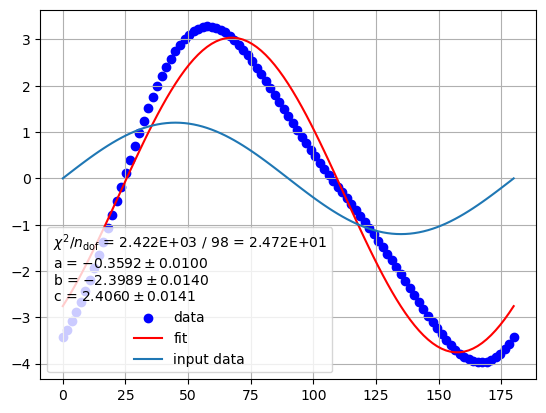

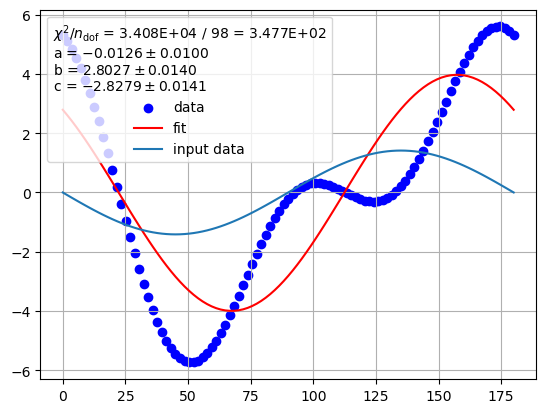

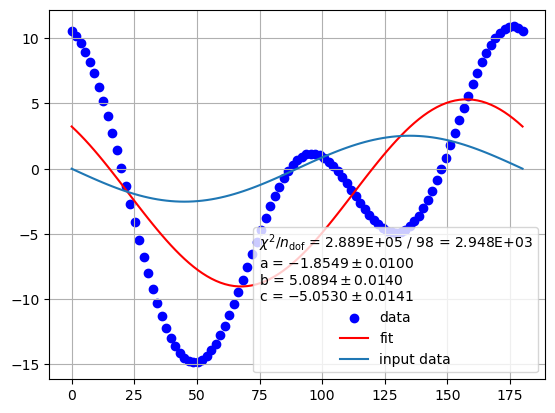

In [15]:
f_acs = [0]*3
m_acs = [0]*3



for i in range(0,3):
    f_acs[i] = np.subtract(df[i].freq_diff, np.add(HQ1[i], HQCSA[i])) 
    # print(HQCSA[i])

    least_squares = LeastSquares(df[i].angle, f_acs[i], 0.1,fourier3)

    #***********************Trying to fit input ACS ****************
    # least_squares = LeastSquares(df[i].angle, df[i].acs, 0.1,fourier3)

    m_acs[i] = Minuit(least_squares, a = 1000, b = 100, c= 100)
    # m_acs[i].fixed["c"] = True
    # # m_d[i].fixed["b"] = True
    # # m[i] = m[i].scan(ncall = 50)

    m_acs[i].migrad()  # finds minimum of least_squares function
    m_acs[i].hesse()   # accurately computes uncertainties
    fit_info = [
        f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_acs[i].fval:.3E} / {m_acs[i].ndof:.0f} = {m_acs[i].fmin.reduced_chi2:.3E}",
    ]
    
    

    for p, v, e in zip(m_d[i].parameters, m_acs[i].values, m_acs[i].errors):
        fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")

    # corr_mat = (m_acs[i].covariance.correlation())
    # # print(corr_mat)
    # # print(m_d[i].migrad())
    # # plt.imshow(corr_mat, cmap='coolwarm')
    
    # draw data and fitted line
    plt.scatter(df[i].angle, f_acs[i], label="data", color = 'blue')
    plt.plot(df[i].angle, fourier3(df[i].angle, *m_acs[i].values), label="fit", color = 'red')
    plt.plot(df[i].angle, df[i].acs, label = "input data")
    # plt.plot(xdata, HQ1[i], label = 'input ')
    # plt.xlabel(r'$Angle$')
    # plt.ylabel(r'$Frequency (Hz)$')
    # # plt.title(titles[i] +'\n'r'$Fitting\ of\ H^1_{CSA} = A + B(cos2\theta )+ C(sin2\theta)$')
    # plt.title(titles[i])
    plt.legend(title="\n".join(fit_info))
    plt.grid()
    plt.show()

**Find HQ,ACS**

In [16]:
a_acs = [0]*3; 
b_acs = [0]*3; 
c_acs = [0]*3; 

par_acs = [a_acs, b_acs, c_acs]

for i in range(0,3):
    for k in range(len(par_acs)):
        par_acs[k][i] = m_acs[i].values[k]
print(par_acs)

[[-0.3591773944905213, -0.012591756801629694, -1.8549202750353713], [-2.398862277037132, 2.8026665898733936, 5.089414764008358], [2.4059549097400508, -2.8279017032191063, -5.0530390741698685]]


In [17]:
a = np.array([[gxy_q, gxz_q, 0], [gxy_q, -gxz_q, -2*gyz_q], [gxz_q, gxy_q, (gyy_q - gzz_q)]])
b = np.array([-a_acs[2]*wX, b_acs[2]*wX, c_acs[2]*wX])

x = np.linalg.solve(a, b)
# print(tabulate[['gxy_acs', x], ['gxz_acs', x], ['gyz_acs', x]])
print('gxy_acs:',x[0],'\n', 'gxz_acs:',x[1],'\n','gyz_acs:', x[2])

gxy_acs: -277883942.0985136 
 gxz_acs: 110121191.58097982 
 gyz_acs: 2136.215802641614
